# Exporting data

Export the values of Ultimate tensile strength, Modulus, Baseline fiber volume, and Poisson's ratio for a set of records from the MI Training database.

This example demonstrates:

* Retrieving a list of databases from a Granta MI server
* Browsing the tables of a Granta MI database
* Searching a Granta MI database using the *CriteriaSearch* operation
* Retrieving values for attributes of a record

## Create a Granta MI Session

Import the GRANTA_MIScriptingToolkit package, and create a connection to a Granta MI server.

In [1]:
import GRANTA_MIScriptingToolkit as gdl

session = gdl.GRANTA_MISession('http://localhost/mi_servicelayer', autoLogon=True)

## Get the Databases

Access the browse service from the session and execute the *GetDatabases* method.

In [2]:
browseService = session.browseService
databases = browseService.GetDatabases().databases

print("Found {0} databases on the Granta MI Server".format(len(databases)))
for d in databases:
    print("Database key: {0.DBKey}, Database name: {0.name}".format(d))

Found 1 databases on the Granta MI Server
Database key: MI_Training, Database name: MI Training


Use pandas to display the available databases.

In [3]:
import pandas as pd

df = pd.DataFrame({'DBKey': [db.DBKey for db in databases],
                  'DBName': [db.name for db in databases]})
df

,DBKey,DBName
0,MI_Training,MI Training


## Get the tables in a database

Use the *GetTables* method from the browse service to see what tables are available in the MI Training database.

In [4]:
dbKey = "MI_Training"

tables = browseService.GetTables(gdl.GetTables(DBKey=dbKey)).tableDetails

print("Found {0} tables in database {1}".format(len(tables), dbKey))
for t in tables:
    print("Table name: {0}".format(t.tableReference.name))

Found 16 tables in database MI_Training
Table name: MaterialUniverse
Table name: ProcessUniverse
Table name: Restricted Substances
Table name: Legislations and Lists
Table name: Design Data
Table name: Composite Design Data
Table name: Tensile Statistical Data
Table name: Tensile Test Data
Table name: Fatigue Statistical Data
Table name: Fatigue Test Data
Table name: Metals Pedigree
Table name: Composite Pedigree
Table name: AM Builds
Table name: Training Exercise (completed)
Table name: Training Exercise for Import
Table name: Files for Training


## Searching a database

Search MI Training for all records in the Tensile Test Data table which have a defined *Young's modulus (11-axis) (normalized)*

In [5]:
table = 'Tensile Test Data'
attribute = "Young's modulus (11-axis) (normalized)"

tableRef = gdl.PartialTableReference(tableName=table)
attrRef = gdl.AttributeReference(name=attribute, DBKey=dbKey, partialTableReference=tableRef)
searchCriterion = gdl.RecordSearchCriterion(searchAttribute=attrRef, existsSearchValue=gdl.ExistsSearchValue())
request = gdl.CriteriaSearch(DBKey=dbKey, searchCriteria=[searchCriterion])

searchResults = session.searchService.CriteriaSearch(request).searchResults

Print the *shortName* and *longName* of each of the records returned by the search.

In [6]:
df2 = pd.DataFrame({'ShortName': [r.shortName for r in searchResults],
                     'LongName': [r.longName  for r in searchResults]})
df2

,ShortName,LongName
0,LBJ6213A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
1,LBJ4211A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
2,LBJ4213A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
3,LBJ1311A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
4,LBJ1312A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
5,LBJ8311A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
6,LBJ6214A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
7,LBJ5313A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
8,LBJ4212A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."
9,LBJ1313A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec..."


## Export data from records

Create attribute references for the attributes you want to export and export data from all records.

In [7]:
attributes = ["Young's Modulus (11-axis) (normalized)", "Ultimate tensile strength (normalized)",
			  "Baseline fiber volume", "Elastic Poisson's Ratio (12-plane)"]

attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributes]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)
       
recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

Print the values of the attributes from the exported records. Note that some records may not have values for all attributes.

In [8]:
s = [None]*len(df2)
for attribute in attributes:
    for idx, record in enumerate(recordData):
        attrValue = next((x for x in record.attributeValues if x.attributeName == attribute), None)
        s[idx] = attrValue.pointDataType.points[0].value if attrValue else None
    df2[attribute] = s
    
df2

,ShortName,LongName,Young's Modulus (11-axis) (normalized),Ultimate tensile strength (normalized),Baseline fiber volume,Elastic Poisson's Ratio (12-plane)
0,LBJ6213A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",47.911673,1392.975515,53.473,0.266
1,LBJ4211A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",48.028883,1535.152318,53.473,0.242
2,LBJ4213A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",48.042673,1601.486784,53.473,0.259
3,LBJ1311A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",47.118775,1566.964731,53.473,0.272
4,LBJ1312A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",47.828935,1557.622334,53.473,0.252
5,LBJ8311A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",48.428779,1556.643278,53.473,0.272
6,LBJ6214A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",46.387931,1322.511090,53.473,0.264
7,LBJ5313A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",47.249776,1490.005443,53.473,0.253
8,LBJ4212A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",45.774298,1580.774931,53.473,0.306
9,LBJ1313A,"S-Glass Unitape S2/SP381, 3M, 0° tension, Spec...",44.236767,1505.711702,53.473,0.264


Create a plot of the exported values

<AxesSubplot:xlabel='Ultimate tensile strength (normalized)', ylabel="Young's Modulus (11-axis) (normalized)">

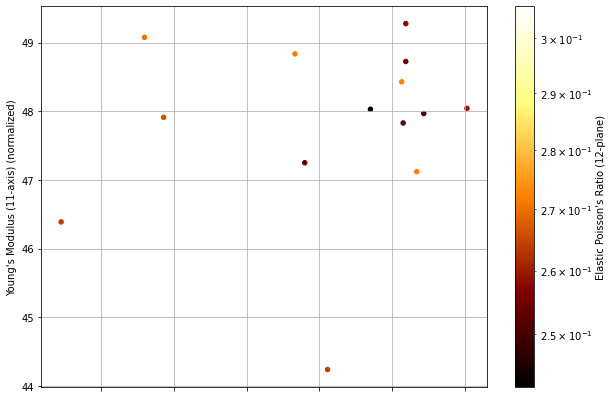

In [9]:
import matplotlib

df2.plot.scatter(x="Ultimate tensile strength (normalized)", y="Young's Modulus (11-axis) (normalized)", loglog=False,
				 c="Elastic Poisson's Ratio (12-plane)", colormap="afmhot", norm=matplotlib.colors.LogNorm(),
                 grid=True, figsize=(10, 7))